## US Income Inequality ##

"""
In this exercise, I explore a random sample of American households collected by the U.S. Census Bureau between 2015 and 2019 as part of the American Community Survey (ACS). In particular, I am going to use this data to measure household income inequality in the United States, then analyze how that income inequality might change under a range of different tax policies.
It will consist of describing main relevant statistics of the sample, such as min, max, mean income, standard deviation, and relevant percentiles.

**Note:** This data only measures *income*—e.g., wages, salaries, etc. As a result, it actually massively underestimates incomes at the top of the United States income distribution because most of the income for high earners comes in the form of capital gains and investment appreciation which are not included here.

The US poverty line is *about* 20,000 dollars a year.
(I say "about" because the actual poverty line for household income depends on the number of people in the household, which we have not included in these data.)

## Gini Index

A standard measure of inequality is the [Gini Index / Gini Coefficient](https://en.wikipedia.org/wiki/Gini_coefficient). The measure takes on a value of 0 when everyone in a population has the same allocation of some resource or property, and a value of 1 when all the resource in population accrues to a single person. It is commonly used to measure income and wealth inequality, although it is also worth noting that it has been used in many other contexts, [including neuroscience.](https://neuroplausible.com/gini) 

For discrete data, the definition of the Gini Index is given below:

$$Gini\ Index = \frac{2 \sum_{i=1}^n i y_i}{n \sum_{i=1}^n y_i} -\frac{n+1}{n}$$
.

**Note:** The Gini Index of income is only one metric of inequality! Results would be very different if we were to calculate, for example, the ratio of the income of the top 0.1% of earners to the income of the lowest-earning 10% of the population, or if we calculated this metric using wealth instead of income!

In the objective of advising for efforts to reduce income inequality, five policies are introduced:
- `Policy A`: give every household that makes less than 40,000 dollars a check for 5,000 dollars, 
- `Policy B`: give every household that makes less than 30,000 dollars a check for 7,000 dollars,
- `Policy C`: apply a tax of 5% to households making more than 250,000 dollars and using the money to pay down the National Debt,
- `Policy D`: apply a 5% tax to people making more than 250,000 dollars and *evenly distributed that tax revenue* to households earning less than 30,000 dollars,
- `Policy E`: apply a 5% tax to people making more than 250,000 dollars and *evenly distributed that tax revenue* to households earning less than 40,000 dollars

The goal is to evaluate whether the income inequality would be decreased, and which would be the best for it.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

dataset = np.loadtxt("./us_household_incomes.txt")

print(f"The dataset consists of {dataset.size} points")

policies = ['Policy A', 'Policy B', 'Policy C', 'Policy D', 'Policy E']

The dataset consists of 933695 points


In [3]:
# 1. data cleaning
print(f"There is {(dataset<0).sum()} negative values in the dataset")
print(f"There is {(np.isnan(dataset)).sum()} nan values in the dataset")

# remove negative values
data = dataset[np.where(dataset>=0)]

There is 304 negative values in the dataset
There is 0 nan values in the dataset


In [5]:
# Get some interesting statistics
print(f"The minimum income is ${round(data.min())}")
print(f"The average income is ${round(data.mean())}")
print(f"The maximum income is ${round(data.max())}")
print(f'The median household income is ${round(np.median(data))}')

print(f'The top 1% household income cutoff is ${np.percentile(data, 99)}')

The minimum income is $0
The average income is $88329
The maximum income is $2410903
The median household income is $62576
The top 1% household income cutoff is $514571.0


Text(0.5, 1.0, 'Household earnings Histogram')

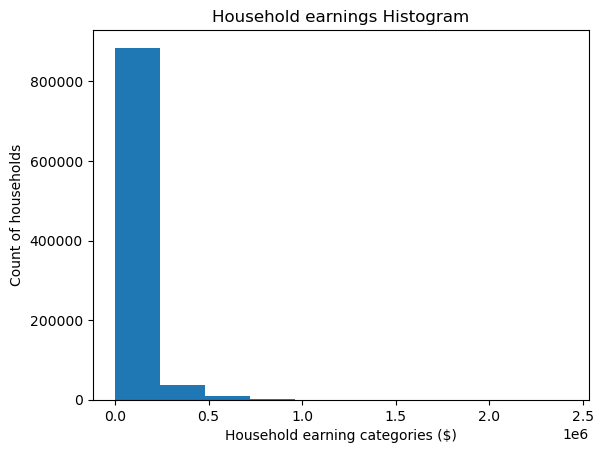

In [7]:
plt.hist(data)
plt.ylabel('Count of households')
plt.xlabel('Household earning categories ($)')
plt.title('Household earnings Histogram')

Text(0.5, 1.0, 'Household earnings Histogram < $500,000')

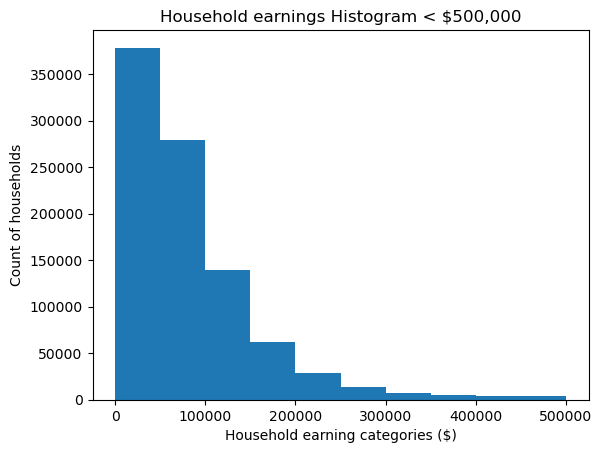

In [9]:
# Histogram is very skewed to the left, which indicates that there are few households that earn a lot compare to most
# Re-plot by ignoring earning > $500,000
plt.hist(data[data < 500_000])
plt.ylabel('Count of households')
plt.xlabel('Household earning categories ($)')
plt.title('Household earnings Histogram < $500,000')

Text(0.5, 1.0, 'Household earnings Histogram < $100,000')

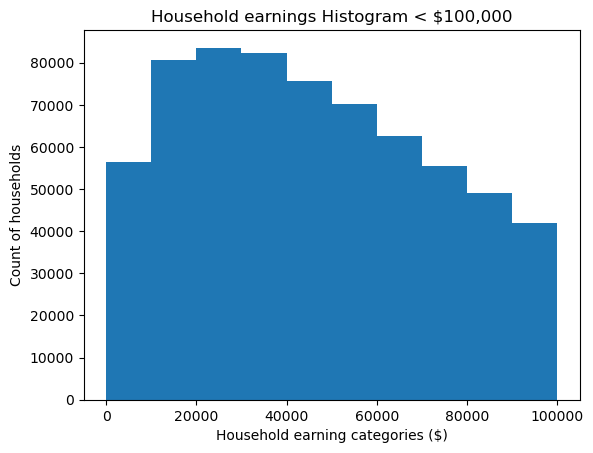

In [11]:
# Let's check the histogram only for earning below $100,000, with bins of 10 years
counts, bin_edges, patches = plt.hist(data[data < 100_000], bins=10)
plt.ylabel('Count of households')
plt.xlabel('Household earning categories ($)')
plt.title('Household earnings Histogram < $100,000')

In [13]:
# Get the category with the maximum counts of household vs the mean income count
max_count = counts.max()
max_bin_indices = np.where(counts == max_count)[0]
max_bin_edges = [bin_edges[i:i+2] for i in max_bin_indices]

# Display the results
print(f"From this, we can see that the largest group of {round(100 * max_count/data.size)}% of US households earn between ${round(max_bin_edges[0][0])} to ${round(max_bin_edges[0][1])}")

print(f"Which compares to that of the {round(100 * ((data<85000) & (data>75000)).sum() / data.size)}% of US households earning the mean income (between $75,000 to $85,000)")


From this, we can see that the largest group of 9% of US households earn between $19999 to $29999
Which compares to that of the 5% of US households earning the mean income (between $75,000 to $85,000)


In [15]:
# Percentile of people under poverty line (< $20,000)
under_pov_line = data[data < 20_000]
pov_share = under_pov_line.size / data.size
print(f"Percent of people living under the poverty line (<20000$): {pov_share*100:0,.1f} %")

Percent of people living under the poverty line (<20000$): 14.7 %


In [25]:
# Now let's consider applying the different policies with the objective of decreasing the inequalities represented by the Gini Index
from ineqpy.inequality import gini
gini_list = []

In [27]:
gini_base = gini(data)
print(f"Current Gini index: {gini_base:,.4f}")
gini_list.append(gini_base)

Current Gini index: 0.4809


In [29]:
# policy A: giving every household that makes less than 40,000 dollars a check for 5,000 dollars
dataA = data.copy()
dataA[dataA < 40_000] = dataA[dataA < 40_000] + 5_000
gini_A = gini(dataA)
print(f"Gini index after implementation of Policy A: {gini_A:,.4f}")
gini_list.append(gini_A)

Gini index after implementation of Policy A: 0.4601


In [31]:
# policy B: giving every household that makes less than 30,000 dollars a check for 7,000 dollars
dataB = data.copy()
dataB[dataB < 30_000] = dataB[dataB < 30_000] + 7_000
gini_B = gini(dataB)
print(f"Gini index after implementation of Policy B:{gini_B:,.4f}")
gini_list.append(gini_B)

Gini index after implementation of Policy B:0.4581


In [33]:
# policy C: applying a tax of 5% to households making more than 250,000 dollars and using the money to pay down the National Debt.
top_5percent = np.percentile(data, 95)
print(f'The top 5% household income cutoff is about $250,000 (${top_5percent})')
tax_rate = 0.05
high_salaries = data[data > 250_000]
money_generated_to_pay_debt = np.sum(tax_rate * high_salaries)

print(f"The money generated to repay the National Debt by implementing policy C is: ${round(money_generated_to_pay_debt)} \n")

dataC = data.copy()

dataC[dataC > 250_000] = dataC[dataC > 250_000] * (1 - tax_rate)

gini_C = gini(dataC)
print(f"Gini index after implementation of Policy C: {gini_C:,.4f}")

gini_list.append(gini_C)

The top 5% household income cutoff is about $250,000 ($246385.0)
The money generated to repay the National Debt by implementing policy C is: $929623341 

Gini index after implementation of Policy C: 0.4754


In [35]:
# policy D: Apply a 5% tax to people making more than 250,000 dollars and evenly distribute that tax revenue to households earning less than 30,000 dollars
low_salaries = data[data < 30_000]
money_generated = np.sum(high_salaries * tax_rate)

print(f'Money collected from taxing households earning over $250,000 following policy D: ${round(money_generated)}')

money_per_low_salaries = money_generated / low_salaries.size
print(f"Money alloted to every households earning less than $30,000 following policy D: ${round(money_per_low_salaries)}")

Money collected from taxing households earning over $250,000 following policy D: $929623341
Money alloted to every households earning less than $30,000 following policy D: $4214


In [37]:
dataD = data.copy()
dataD[dataD < 30_000] = dataD[dataD < 30_000] + money_per_low_salaries
dataD[dataD > 250_000] = dataD[dataD > 250_000] * 0.95
gini_D = gini(dataD)
print(f"Gini index after implementation of Policy D: {gini_D:,.4f}")

gini_list.append(gini_D)

Gini index after implementation of Policy D: 0.4615


In [41]:
# policy E: distribute the revenue generated with the same tax as Policy D, but this time we would distribute it evenly to all households earning less than 40,000 dollars (instead of less than 30,000 dollars).
dataE = data.copy()
low_salariesE = dataE[dataE < 40_000]
money_per_low_salaries = money_generated / low_salariesE.size

print(f"Money alloted to every households earning less than $40,000 following policy D: ${round(money_per_low_salaries)}")

dataE[dataE < 40_000] = dataE[dataE < 40_000] + money_per_low_salaries
dataE[dataE > 250_000] = dataE[dataE > 250_000] * 0.95
gini_E = gini(dataE)
print(f"Gini index after implementaion of Policy E: {gini_E:,.4f}")

gini_list.append(gini_E)

Money alloted to every households earning less than $40,000 following policy D: $3069
Gini index after implementaion of Policy E: 0.4625


In [43]:
# Deciding which policy could better reduce inequality based on the Gini Index
gini_array = np.array([gini_D, gini_E])
best_gini_idx = np.argmin(np.array(gini_list))

print(f"The best policy to implement to reduce inequality would be {policies[best_gini_idx]}, giving a Gini index of: {gini_list[best_gini_idx]:,.4f}")

The best policy to implement to reduce inequality would be Policy C, giving a Gini index of: 0.4581


In [45]:
# At this point, the best policy is policy C, i.e. giving $7,000 to the lowest salaries (<$30,000). However, how would this be funded ?
# Increasing National Debt for this is not the best idea, therefore what tax_rate would be needed to generate an amount worth $7,000 for each low income household ?
low_salaries = data[data < 30_000]
low_salary_check = 7000

money_to_generate = low_salaries.size * low_salary_check
print(f"The money to generate amounts to ${money_to_generate}")

new_tax_rate = 100 * money_to_generate / data[data > 250_000].sum()
print(f"In order for the lowest income households (<$30,000) to receive a $7,000 check fromm taxing the highest income households (>$250,000), the new tax rate should be {new_tax_rate:,.1f}%")

dataF = data.copy()
dataF[dataF < 30_000] += low_salary_check
dataF[dataF > 250_000] *= (1-new_tax_rate/100)
print(f"With this new policy F, i.e. taxing {new_tax_rate:,.1f}% the richest households and equally giving the money to the poorest households, the new Gini Index is: {gini(dataF):,.4f}")

The money to generate amounts to $1544214000
In order for the lowest income households (<$30,000) to receive a $7,000 check fromm taxing the highest income households (>$250,000), the new tax rate should be 8.3%
With this new policy F, i.e. taxing 8.3% the richest households and equally giving the money to the poorest households, the new Gini Index is: 0.4487


(0.0, 120000.0)

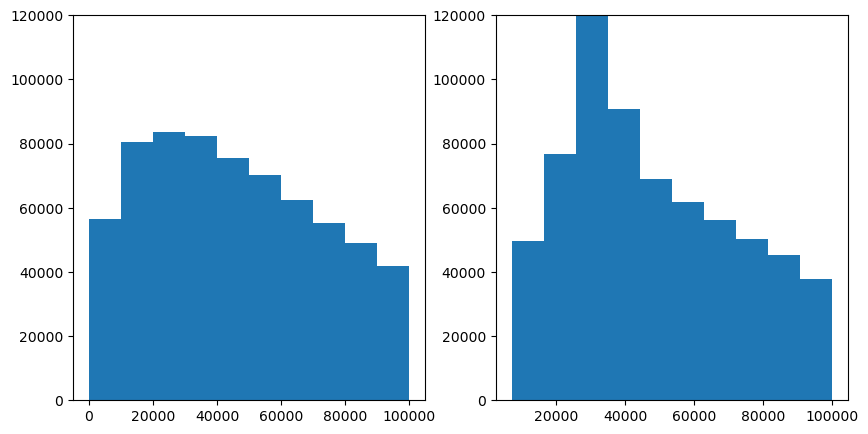

In [47]:
# Comparing the histograms before and after policy F
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(data[data<100000])
ax[1].hist(dataF[dataF<100000])
ax[0].set_ylim(0, 120000)
ax[1].set_ylim(0, 120000)

In [51]:
# Interestingly, the application of such policy doesn't affect the average nor median income within the population.
print(f"The average income is now ${round(dataF.mean())}")
print(f'The median household income is now ${round(np.median(data))}')

# It would be interesting to understand the societal impact of such policy on the evolution of certain social categories.
# Would a low income household be more likely to more from low to middle / low ? How would it affect jobs and overall cost of life ?

The average income is now $88329
The median household income is now $62576
